# SopPhoto: Computes Apparent Magnitude 

Hajime Kawahara March 5th 2025

In ExoJAX, computed spectra can be easily converted into photometric information, specifically apparent magnitude. This is achieved using `SopPhoto`, one of the spectral operators.
By default, the calculation is performed using filter functions provided by [SVO](http://svo2.cab.inta-csic.es/theory/fps/). In this example, the SDSS G-band filter is used.


In [1]:
from exojax.postproc.specop import SopPhoto    

filter_name = "SLOAN/SDSS.g"
sop_photo = SopPhoto(filter_name, download=True)

/home/kawahara/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


filter_id =  SLOAN/SDSS.g
You can check the available filters at http://svo2.cab.inta-csic.es/theory/fps/
resolution_photo= 6123.2
save  .database/filter/svo/SLOAN/SDSS.g.csv
save  .database/filter/svo/SLOAN/SDSS.g.info.csv
xsmode =  premodit
xsmode assumes ESLOG in wavenumber space: xsmode=premodit
Your wavelength grid is in ***  descending  *** order
The wavenumber grid is in ascending order by definition.
Please be careful when you use the wavelength grid.


/home/kawahara/exojax/src/exojax/utils.grids.py:82: UserWarning: Both input wavelength and output wavenumber are in ascending order.
  warnings.warn(
/home/kawahara/exojax/src/exojax/utils/grids.py:170: UserWarning: Resolution may be too small. R=6123.03886194115
  warnings.warn("Resolution may be too small. R=" + str(resolution), UserWarning)


When `SopPhoto` is called, it calculates the transmission curve by interpolating the transmission data obtained from SVO onto the wavenumber grid in ESLOG base; `nu_grid_filter`, `transmission_filter`. These interpolated transmissions can be directly used for `opa` calculations. The resolution can be adjusted by specifying the factor by which the original resolution is increased using `up_resolution_factor`.


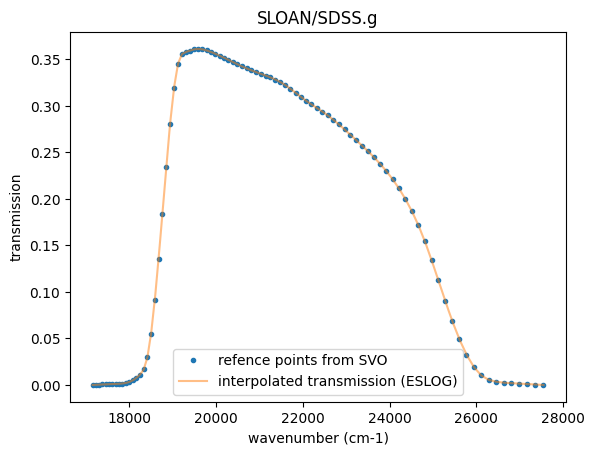

In [2]:
import matplotlib.pyplot as plt
plt.plot(sop_photo.nu_ref, sop_photo.transmission_ref, ".", label="refence points from SVO")
plt.plot(sop_photo.nu_grid_filter, sop_photo.transmission_filter, alpha=0.5,label="interpolated transmission (ESLOG)")
plt.legend()
plt.title(sop_photo.filter_id)
plt.xlabel("wavenumber (cm-1)")
plt.ylabel("transmission")
plt.show()

In this example, let's compute the apparent magnitude (which is essentially the absolute magnitude!) of a blackbody sphere with the same temperature as the Sun placed at 10 pc. 

Recall the flux from a black body sphere with a radius R, temperature T at distance of d is given by

$f_\nu = \pi B_\nu (T) \frac{R^2}{d^2}$

where 
$B_\nu (T)$
is the Planck function. 

In [3]:

# Sun
from exojax.rt.planck import piB
from exojax.utils.constants import RJ, Rs
from exojax.utils.constants import pc

flux = piB(5772.0, sop_photo.nu_grid_filter) * (Rs/RJ) ** 2 / (10.0) ** 2 * (RJ / pc)**2 #erg/s/cm2/cm-1

mag = sop_photo.apparent_magnitude(flux)
print(mag)


5.3326893
